## Importing all the datasets

In [1]:
import pandas as pd

directory = "../preprocessed/"
directories = [directory + "gemini_annotated.csv", directory + "mistral_annotated.csv", directory + "llama_annotated.csv", directory + "gpt_annotated.csv", directory + "manually_annotated.csv"]

In [2]:
gemini_df = pd.read_csv(directories[0], index_col='Index')
mistral_df = pd.read_csv(directories[1], index_col='Index')
llama_df = pd.read_csv(directories[2], index_col='Index')
gpt_df = pd.read_csv(directories[3], index_col='Index')
manually_df = pd.read_csv(directories[4], index_col='Index')

In [3]:
datasets = {
    'Manual': manually_df,
    'GPT': gpt_df,
    'Gemini': gemini_df,
    'Mistral': mistral_df,
    'Llama': llama_df
}

In [4]:
for df in [manually_df, gemini_df, mistral_df, gpt_df, llama_df]:
    if 'Index' not in df.columns:
        df['Index'] = df.index

In [5]:
manual_df = manually_df
llm_dfs = [gpt_df, gemini_df, mistral_df, llama_df]

In [6]:
manually_df.head()

,Text,Clarity of Review,Justification of Scores,Depth of Analysis,Fairness and Objectivity,Constructiveness of Feedback,Engagement with Related Work,Accuracy in Understanding,Consistency of Evaluation,Identification of Novelty,Ethical Considerations and Responsibility,Index
Index,,,,,,,,,,,,
B11bwYgfM-R1,The idea of using cross-task transfer performa...,1,1,1,1,1,1,1,1,1,1,B11bwYgfM-R1
B11bwYgfM-R2,This paper proposes a method for multitask and...,1,1,1,1,1,-1,1,1,1,1,B11bwYgfM-R2
B11bwYgfM-R3,The authors propose techniques for multitask a...,1,1,1,1,1,1,1,1,1,1,B11bwYgfM-R3
B12Js_yRb-R1,\nSummary: \n- This paper proposes a hand-desi...,1,1,1,1,1,1,1,1,1,1,B12Js_yRb-R1
B12Js_yRb-R2,Summary\n - This paper mainly focuses on a cou...,1,1,-1,1,1,-1,1,1,1,1,B12Js_yRb-R2


## Simple Statistical Analysis

In [7]:
criteria_columns = [
    'Clarity of Review', 'Justification of Scores', 'Depth of Analysis', 
    'Fairness and Objectivity', 'Constructiveness of Feedback', 'Engagement with Related Work', 
    'Accuracy in Understanding', 'Consistency of Evaluation', 'Identification of Novelty', 
    'Ethical Considerations and Responsibility'
]

In [8]:
distribution_data = []

for dataset_name, df in datasets.items():
    for criterion in criteria_columns:
        pos_count = (df[criterion] == 1).sum()
        neg_count = (df[criterion] == -1).sum()
        distribution_data.append({
            'Dataset': dataset_name,
            'Criterion': criterion,
            'Positive': pos_count,
            'Negative': neg_count
        })

distribution_df = pd.DataFrame(distribution_data)

In [9]:
distribution_df

,Dataset,Criterion,Positive,Negative
0,Manual,Clarity of Review,165,11
1,Manual,Justification of Scores,150,26
2,Manual,Depth of Analysis,140,36
3,Manual,Fairness and Objectivity,60,116
4,Manual,Constructiveness of Feedback,100,76
5,Manual,Engagement with Related Work,68,108
6,Manual,Accuracy in Understanding,98,78
7,Manual,Consistency of Evaluation,98,78
8,Manual,Identification of Novelty,56,120
9,Manual,Ethical Considerations and Responsibility,47,129


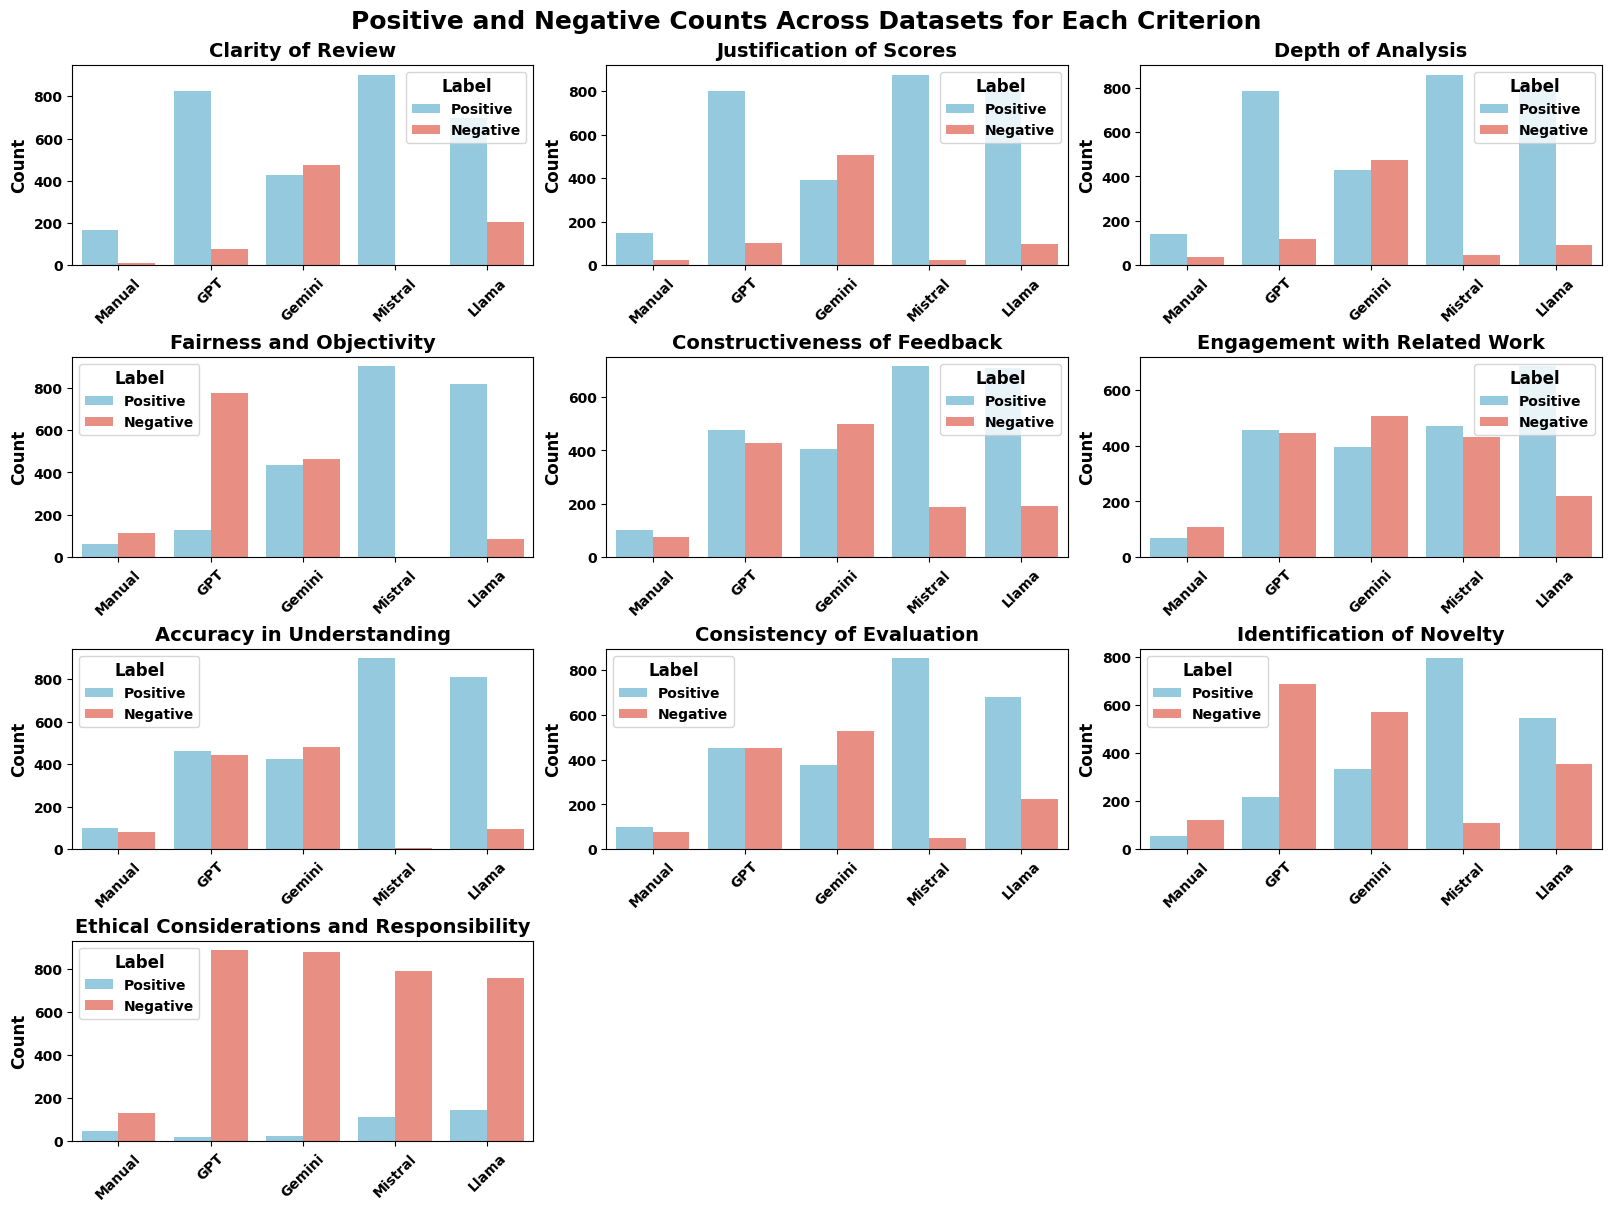

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

criteria = distribution_df['Criterion'].unique()
n_criteria = len(criteria)
n_cols = 3  
n_rows = (n_criteria + n_cols - 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12), constrained_layout=True)
axes = axes.flatten()

for i, criterion in enumerate(criteria):
    data = distribution_df[distribution_df['Criterion'] == criterion]
    
    melted_data = data.melt(id_vars=["Dataset", "Criterion"], 
                            value_vars=["Positive", "Negative"], 
                            var_name="Label", 
                            value_name="Count")
    
    sns.barplot(
        data=melted_data, 
        x="Dataset", y="Count", hue="Label", 
        palette={"Positive": "skyblue", "Negative": "salmon"}, 
        ax=axes[i]
    )

    axes[i].set_title(criterion, fontsize=14, fontweight='bold')
    axes[i].set_xlabel("", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Count", fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)

    for label in axes[i].get_xticklabels():
        label.set_fontsize(10)
        label.set_fontweight('bold')

    for label in axes[i].get_yticklabels():
        label.set_fontsize(10)
        label.set_fontweight('bold')

    legend = axes[i].get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontweight('bold')
        legend.set_title("Label", prop={'weight': 'bold', 'size': 12})
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Positive and Negative Counts Across Datasets for Each Criterion", fontsize=18, fontweight='bold')
plt.show()


## Implemeting cohen's kappa

In [11]:
%pip install --quiet --upgrade statsmodels

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score
import statsmodels.stats.inter_rater as ir
from scipy import stats

results = []
llm_names = list(set(datasets.keys()) - set(['Manual']))

for llm_df, llm_name in zip(llm_dfs, llm_names):
    manual_copy = manual_df.copy()
    llm_copy = llm_df.copy()
    
    if 'Index' in manual_copy.columns and manual_copy.index.name == 'Index':
        manual_copy = manual_copy.reset_index(drop=True)
    if 'Index' in llm_copy.columns and llm_copy.index.name == 'Index':
        llm_copy = llm_copy.reset_index(drop=True)
    common_indices = set(manual_df['Index']) & set(llm_df['Index'])
    if not common_indices:
        print(f"No common indices found for {llm_name}")
        continue
        
    manual_subset = manual_copy[manual_copy['Index'].isin(common_indices)]
    llm_subset = llm_copy[llm_copy['Index'].isin(common_indices)]
    
    manual_subset = manual_subset.sort_values('Index').reset_index(drop=True)
    llm_subset = llm_subset.sort_values('Index').reset_index(drop=True)
    
    if not all(manual_subset['Index'] == llm_subset['Index']):
        raise ValueError(f"Indices not properly aligned for {llm_name}")

    kappas = []
    for col in criteria_columns:
        kappa = cohen_kappa_score(manual_subset[col], llm_subset[col])
        kappas.append(kappa)
    
    mean_kappa = np.mean(kappas)
    
    agreements = []
    for col in criteria_columns:
        agreement = (manual_subset[col] == llm_subset[col]).mean()
        agreements.append(agreement)
    
    mean_alignment = np.mean(agreements) * 100
    
    _, p_value = stats.ttest_rel(manual_subset[criteria_columns].values.flatten(),
                                llm_subset[criteria_columns].values.flatten())
    
    results.append({
        'Model': llm_name,
        'Agreement Metric': "Cohen's Kappa",
        'Alignment Score': f"{mean_alignment:.2f}",
        'Kappa Score': f"{mean_kappa:.3f}",
        'p-Value': f"{p_value:.4f}"
    })

In [13]:
results_df = pd.DataFrame(results)
latex_table = results_df.to_latex(index=False, escape=False)
print(latex_table)

\begin{tabular}{lllll}
\toprule
Model & Agreement Metric & Alignment Score & Kappa Score & p-Value \\
\midrule
GPT & Cohen's Kappa & 87.44 & 0.662 & 0.0000 \\
Mistral & Cohen's Kappa & 50.74 & -0.037 & 0.0000 \\
Llama & Cohen's Kappa & 64.49 & 0.103 & 0.0000 \\
Gemini & Cohen's Kappa & 54.55 & 0.012 & 0.0000 \\
\bottomrule
\end{tabular}



In [14]:
from statsmodels.stats.inter_rater import fleiss_kappa

def calculate_fleiss_kappa_per_criterion(llm_dfs, annotation_columns):
    results = {}
    
    for criterion in annotation_columns:
        n_items = len(llm_dfs[0])  
        data_matrix = np.zeros((n_items, 2))  
        
        for i in range(n_items):
            ratings = [df.iloc[i][criterion] for df in llm_dfs]
            for rating in ratings:
                idx = 1 if rating == 1 else 0
                data_matrix[i, idx] += 1
        
        kappa = fleiss_kappa(data_matrix)
        
        perfect_agreement = np.sum(np.any(data_matrix == 4, axis=1))
        majority_agreement = np.sum(np.any(data_matrix == 3, axis=1))
        split_decision = np.sum(np.all(data_matrix == 2, axis=1))
        
        results[criterion] = {
            'kappa': kappa,
            'perfect_agreement': perfect_agreement,
            'perfect_agreement_percentage': (perfect_agreement / n_items) * 100,
            'majority_agreement': majority_agreement,
            'majority_agreement_percentage': (majority_agreement / n_items) * 100,
            'split_decision': split_decision,
            'split_decision_percentage': (split_decision / n_items) * 100,
            'data_matrix': data_matrix
        }
    
    return results

In [15]:
def print_comprehensive_results(results):

    print("\nFleiss' Kappa Results for Each Criterion:")
    print("-" * 80)
    
    kappa_values = [results[criterion]['kappa'] for criterion in results]
    avg_kappa = np.mean(kappa_values)
    
    print(f"Average Kappa across all criteria: {avg_kappa:.3f}\n")
    
    for criterion in results:
        stats = results[criterion]
        print(f"\n{criterion}:")
        print(f"Kappa: {stats['kappa']:.3f}")
        print(f"Perfect Agreement: {stats['perfect_agreement']} cases ({stats['perfect_agreement_percentage']:.1f}%)")
        print(f"Majority Agreement: {stats['majority_agreement']} cases ({stats['majority_agreement_percentage']:.1f}%)")
        print(f"Split Decisions: {stats['split_decision']} cases ({stats['split_decision_percentage']:.1f}%)")
        print("-" * 40)

In [16]:
annotation_columns = [col for col in llm_dfs[0].columns if col not in ['Index', 'Text']]
results = calculate_fleiss_kappa_per_criterion(llm_dfs, annotation_columns)
print_comprehensive_results(results)


Fleiss' Kappa Results for Each Criterion:
--------------------------------------------------------------------------------
Average Kappa across all criteria: -0.011


Clarity of Review:
Kappa: -0.075
Perfect Agreement: 301 cases (33.3%)
Majority Agreement: 475 cases (52.6%)
Split Decisions: 127 cases (14.1%)
----------------------------------------

Justification of Scores:
Kappa: -0.072
Perfect Agreement: 310 cases (34.3%)
Majority Agreement: 489 cases (54.2%)
Split Decisions: 104 cases (11.5%)
----------------------------------------

Depth of Analysis:
Kappa: -0.018
Perfect Agreement: 343 cases (38.0%)
Majority Agreement: 463 cases (51.3%)
Split Decisions: 97 cases (10.7%)
----------------------------------------

Fairness and Objectivity:
Kappa: -0.185
Perfect Agreement: 39 cases (4.3%)
Majority Agreement: 470 cases (52.0%)
Split Decisions: 394 cases (43.6%)
----------------------------------------

Constructiveness of Feedback:
Kappa: 0.124
Perfect Agreement: 239 cases (26.5%)
Ma

In [17]:
total_cases = len(llm_dfs[0]) * len(annotation_columns)
total_perfect = sum(results[c]['perfect_agreement'] for c in results)
total_majority = sum(results[c]['majority_agreement'] for c in results)
total_split = sum(results[c]['split_decision'] for c in results)

print("\nOverall Agreement Trends:")
print(f"Perfect Agreement Rate: {(total_perfect/total_cases)*100:.1f}%")
print(f"Majority Agreement Rate: {(total_majority/total_cases)*100:.1f}%")
print(f"Split Decision Rate: {(total_split/total_cases)*100:.1f}%")


Overall Agreement Trends:
Perfect Agreement Rate: 28.3%
Majority Agreement Rate: 48.2%
Split Decision Rate: 23.5%


In [18]:
def interpret_kappa(k):
    if k < 0: return "Poor"
    elif k < 0.20: return "Slight"
    elif k < 0.40: return "Fair"
    elif k < 0.60: return "Moderate"
    elif k < 0.80: return "Substantial"
    else: return "Almost Perfect"

In [19]:
avg_kappa = -0.011
print("\nKappa Interpretation:")
print(f"Average Kappa ({avg_kappa:.3f}): {interpret_kappa(avg_kappa)}")
for criterion in results:
    k = results[criterion]['kappa']
    print(f"{criterion}: {k:.3f} - {interpret_kappa(k)}")


Kappa Interpretation:
Average Kappa (-0.011): Poor
Clarity of Review: -0.075 - Poor
Justification of Scores: -0.072 - Poor
Depth of Analysis: -0.018 - Poor
Fairness and Objectivity: -0.185 - Poor
Constructiveness of Feedback: 0.124 - Slight
Engagement with Related Work: 0.065 - Slight
Accuracy in Understanding: -0.071 - Poor
Consistency of Evaluation: -0.053 - Poor
Identification of Novelty: 0.024 - Slight
Ethical Considerations and Responsibility: 0.154 - Slight


## Visualization of the results

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

model_data = pd.DataFrame({
    'Model': ['Mistral', 'Llama', 'Gemini', 'GPT'],
    'Agreement Metric': ["Cohen's Kappa"] * 4,
    'Alignment Score': [87.44, 50.74, 64.49, 54.55],
    'Kappa Score': [0.662, -0.037, 0.103, 0.012],
    'p-Value': [0.0000, 0.0000, 0.0000, 0.0000],
})

In [21]:
criteria_data = pd.DataFrame({
    'Criterion': [
        'Clarity of Review', 'Justification of Scores', 'Depth of Analysis',
        'Fairness and Objectivity', 'Constructiveness of Feedback',
        'Engagement with Related Work', 'Accuracy in Understanding',
        'Consistency of Evaluation', 'Identification of Novelty',
        'Ethical Considerations and Responsibility'
    ],
    'Kappa': [
        -0.075, -0.072, -0.018, -0.185, 0.124, 0.065,
        -0.071, -0.053, 0.024, 0.154
    ],
    'Agreement': ['Poor', 'Poor', 'Poor', 'Poor', 'Slight', 'Slight', 'Poor', 'Poor', 'Slight', 'Slight'],
})

In [22]:
overall_agreement = {
    'Perfect': 28.3,
    'Majority': 48.2,
    'Split': 23.5,
}

C:\Users\TIRATH BHATHAWALA\AppData\Local\Temp\ipykernel_22280\2406001958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=model_data, x='Model', y='Alignment Score', palette='viridis')


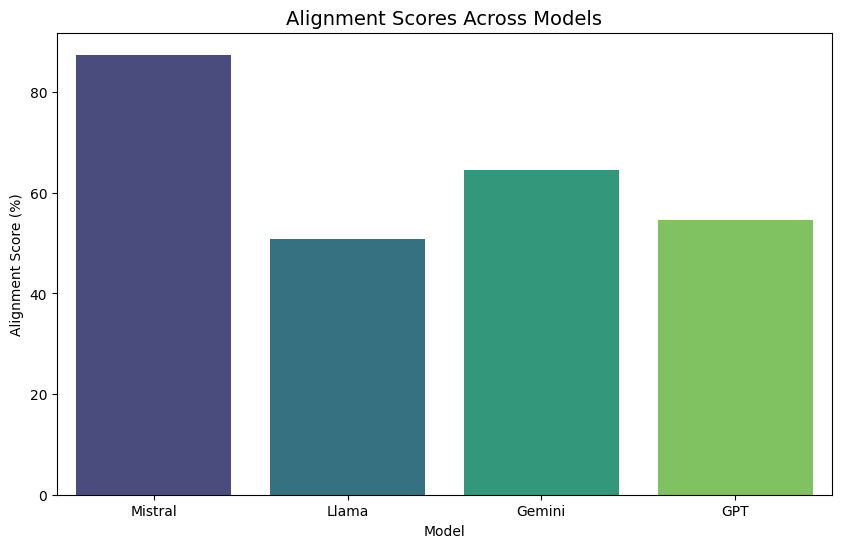

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=model_data, x='Model', y='Alignment Score', palette='viridis')
plt.title('Alignment Scores Across Models', fontsize=14)
plt.ylabel('Alignment Score (%)')
plt.show()

C:\Users\TIRATH BHATHAWALA\AppData\Local\Temp\ipykernel_22280\2142739371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agreement_df, y='Type', x='Rate', palette='coolwarm')


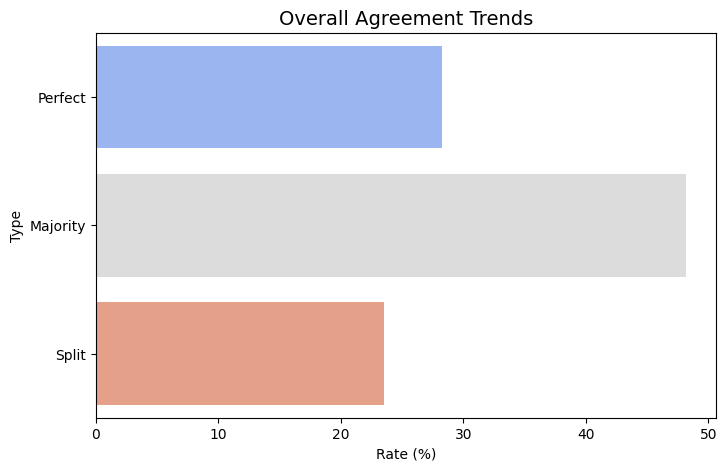

In [24]:
agreement_df = pd.DataFrame(list(overall_agreement.items()), columns=['Type', 'Rate'])
plt.figure(figsize=(8, 5))
sns.barplot(data=agreement_df, y='Type', x='Rate', palette='coolwarm')
plt.title('Overall Agreement Trends', fontsize=14)
plt.xlabel('Rate (%)')
plt.show()

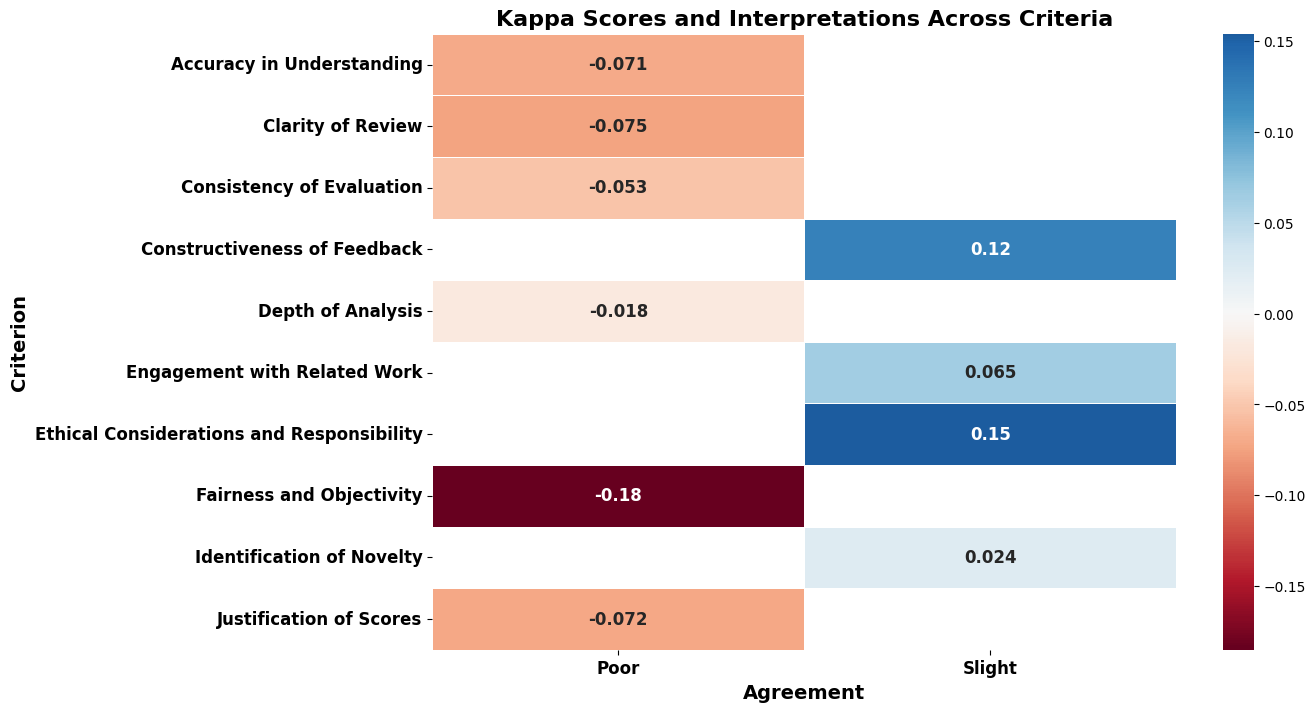

In [25]:
pivot_criteria = criteria_data.pivot(index='Criterion', columns='Agreement', values='Kappa')

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    pivot_criteria,
    annot=True,
    cmap='RdBu',
    center=0,
    linewidths=0.5,
    annot_kws={'fontsize': 12, 'fontweight': 'bold'}, 
)

plt.title('Kappa Scores and Interpretations Across Criteria', fontsize=16, fontweight='bold')

plt.xlabel(pivot_criteria.columns.name, fontsize=14, fontweight='bold') 
plt.ylabel(pivot_criteria.index.name, fontsize=14, fontweight='bold')   

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

plt.show()

In [26]:
visual_data = []
for criterion, stats in results.items():
    visual_data.append({
        'Criterion': criterion,
        'Kappa': stats['kappa'] * 100,
        'Perfect Agreement (%)': stats['perfect_agreement_percentage'],
        'Majority Agreement (%)': stats['majority_agreement_percentage'],
        'Split Decision (%)': stats['split_decision_percentage']
    })

visual_df = pd.DataFrame(visual_data)

In [27]:
%pip install --upgrade --quiet plotly

Note: you may need to restart the kernel to use updated packages.


In [36]:
import plotly.express as px

fig = px.bar(
    visual_df.melt(id_vars='Criterion', var_name='Agreement Type', value_name='Percentage'),
    x='Agreement Type',
    y='Percentage',
    color='Criterion',
    barmode='group',
    title='Agreement Percentages by Criterion'
)

fig.update_layout(
    title=dict(
        text='Agreement Percentages by Criterion',
        font=dict(size=20, family='Arial Black', color='black'),
    ),
    xaxis=dict(
        title=dict(text='Agreement Type', font=dict(size=16, family='Arial Black')),
        tickfont=dict(size=14, family='Arial Black'),
    ),
    yaxis=dict(
        title=dict(text='Percentage', font=dict(size=16, family='Arial Black')),
        tickfont=dict(size=14, family='Arial Black'),
    ),
    legend=dict(
        title=dict(text='Criterion', font=dict(size=14, family='Arial Black')),
        font=dict(size=12, family='Arial Black'), 
        yanchor='bottom',
        y=1.02,
        xanchor='left',
        x=0.5
    )
)

fig.update_traces(
    textfont=dict(size=12, family='Arial Black'),
    textposition="outside"  
)

fig.show()